In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
from numpy import diff
from scipy.stats import sem
import os
import uncertainties as unc
from uncertainties import ufloat
from uncertainties.umath import *

In [4]:
data = pd.read_csv("ring_down/ring_down_17.txt", sep = "\t", skiprows = range(0,1))

In [3]:
print(data)
print(type(data))

              (us)       (mV)
0      -250.001991  184.13200
1      -250.000991  184.13200
2      -249.999991  179.53370
3      -249.998991  184.13200
4      -249.997991  184.13200
...            ...        ...
499999  249.996995   18.40859
500000  249.997995   23.00689
500001  249.998995   23.00689
500002  249.999995   23.00689
500003  250.000995   18.40859

[500004 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


RangeIndex(start=0, stop=500004, step=1)
[245002 245003 245004 ... 500001 500002 500003]
[255002 255003 255004 ... 500001 500002 500003]
(500004,)
184.132
245002
[-19.69761938  99.14873114]


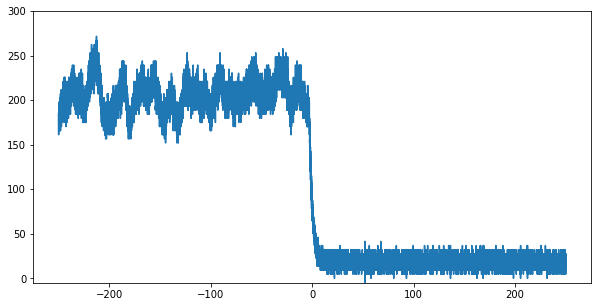

In [4]:
plt.figure(figsize = (10,5))
x = data['(us)']
y = data['(mV)']
plt.plot(x, y)
# plt.xlim([-20, 20])
plt.ylim([-5, 300])
print(x.index)
print(data[data['(us)']>=-5].index.values)
print(data[data['(us)']>=5].index.values)


xnp = x.to_numpy()
ynp = y.to_numpy()

print(ynp.shape)
print(ynp[0])

start = np.where(xnp>=-5)
print(start[0][0])
xnp1 = xnp[245002:255002]
ynp1 = ynp[245002:255002]

curve_fit = np.polyfit(xnp1, ynp1, 1)
print(curve_fit)
fit = np.log(109)*np.exp(-xnp1) 

# plt.plot(xnp1, fit, color = "red")
# plt.show()

# xnp1 = np.arange(np.where(xnp>=-5)[0], np.where(xnp>=5)[0])
# print(xnp1)


# print(np.where(xnp>=10))
# print(xnp.index[-20])

# xnp = x.to_numpy()
# ynp = y.to_numpy()
# print(xnp.index(-20)
# fit = np.polyfit(x, np.log(y), 1)
# plt.fit()

# def exp_decay(t, a, tau, b):
#     return a*np.exp(-t/tau) + b
# popt, pcov = scipy.optimize.curve_fit(exp_decay, x, y_noisy)

# xnp = xnp.range(-10,10)
# curve_fit = np.polyfit(x, y, 1)
# print(curve_fit)
# fit = np.exp(-0.605*xnp)
# plt.plot(xnp, fit, color = "red")
      

# Writing clean code again

246802
255002
Amplitude: 64.7703372980219 Decay constant: 2.91185264397831 Constant: 20.862398546225982


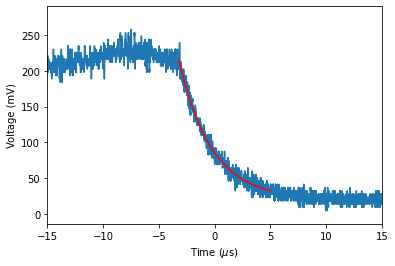

Reflectivity 0.9951640964127957
Finesse 646.4976313173702


In [5]:
data = pd.read_csv("ring_down/ring_down_05.txt", sep = "\t", skiprows = range(0,1))
x = data['(us)']
y = data['(mV)']

xnp = x.to_numpy()
ynp = y.to_numpy()

xnp = xnp[~np.isnan(xnp)]
ynp = ynp[~np.isnan(ynp)]

start = np.where(xnp>=-3.2)
print(start[0][0])
end = np.where(xnp>=5)
print(end[0][0])
xnp1 = xnp[start[0][0]:end[0][0]]
ynp1 = ynp[start[0][0]:end[0][0]]
# print(xnp1)

# Calculating the derivative 
# dydx = diff(ynp1) / diff(xnp1)
# print(dydx) #does not work


def exp_decay(t, a, k, c):
    return a * np.exp(-k * t) + c

def fit_nonlinear(t, y):
    opt_para, para_cov = sp.optimize.curve_fit(exp_decay, t, y, maxfev = 5000)
    a, k, c = opt_para
    return a, k, c

a, k, c = fit_nonlinear(xnp1, ynp1)
# y_err = sem(ynp)
# print(y_err)
print("Amplitude:", a, "Decay constant:", 1/k, "Constant:", c)
fit = exp_decay(xnp1, a, k ,c)

plt.plot(x, y)
plt.xlabel('Time (' r'$\mu$' 's)')
plt.ylabel("Voltage (mV)")
plt.plot(xnp1, fit, color = "red")
plt.xlim(-15, 15)
plt.show()

p = 0.9981852868527146
t_dec = k * 10 ** (-6)
c = 299792458
r = np.sqrt(np.exp((-p) / (c * t_dec)))
print('Reflectivity', r)
f = (np.pi * r) / (1 - r)
print("Finesse", f)

# Code to look at all the data

ring_down_01.txt


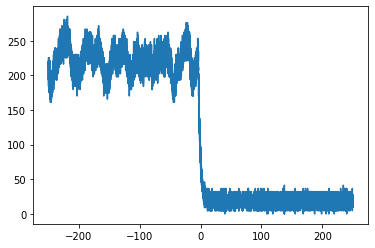

246802
255002
ring_down_02.txt


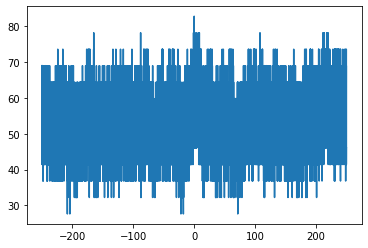

246802
255002
ring_down_03.txt


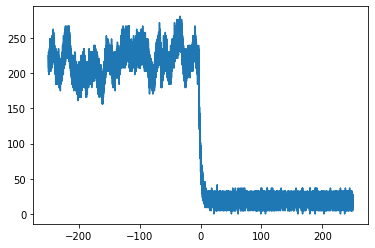

246802
255002
ring_down_04.txt


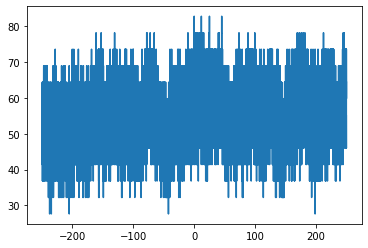

246802
255002
ring_down_05.txt


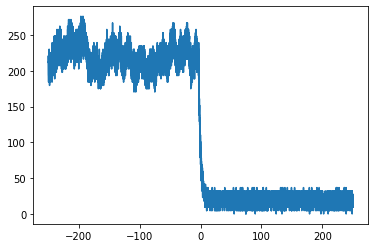

246802
255002
ring_down_06.txt


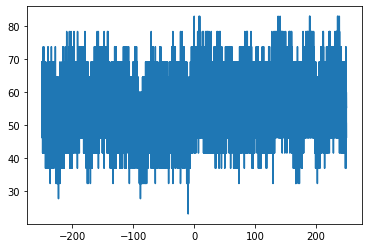

246802
255002
ring_down_07.txt


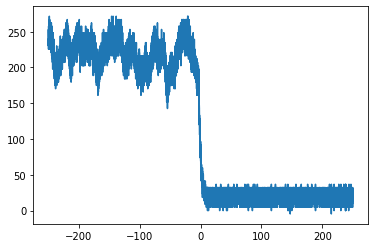

246802
255002
ring_down_08.txt


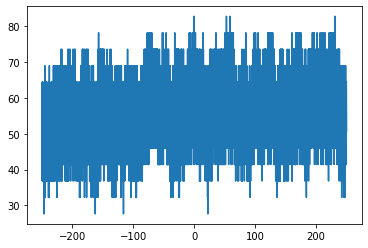

246802
255002
ring_down_09.txt


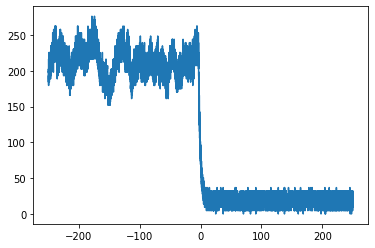

246802
255002
ring_down_10.txt


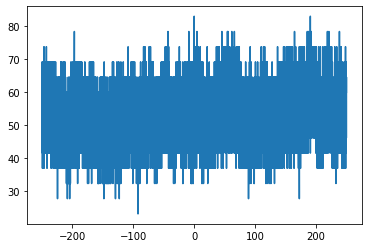

246802
255002
ring_down_11.txt


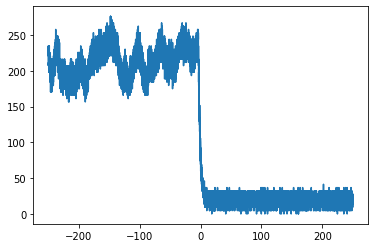

246802
255002
ring_down_12.txt


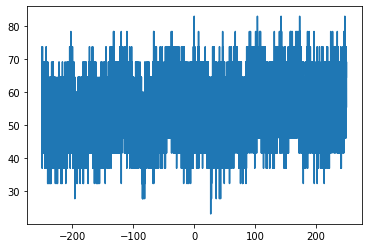

246802
255002
ring_down_13.txt


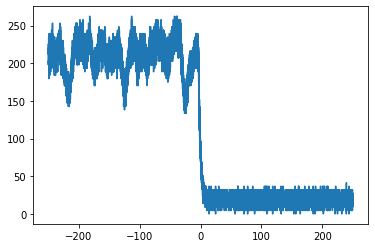

246802
255002
ring_down_14.txt


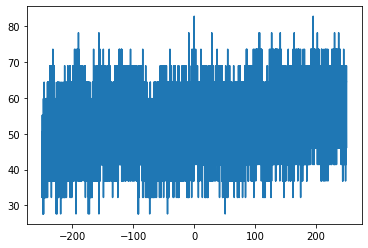

246802
255002
ring_down_15.txt


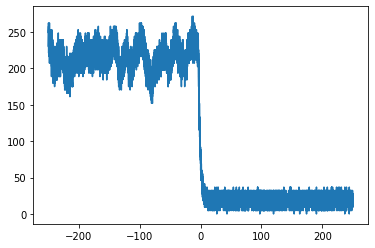

246802
255002
ring_down_16.txt


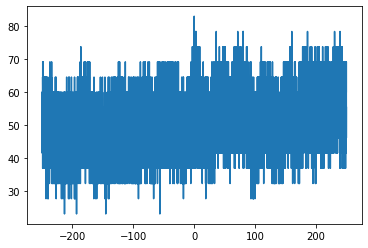

246802
255002
ring_down_17.txt


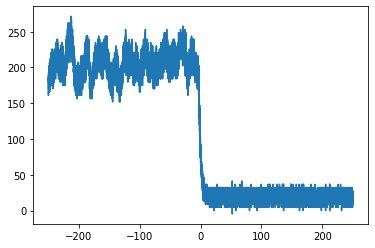

246802
255002
ring_down_18.txt


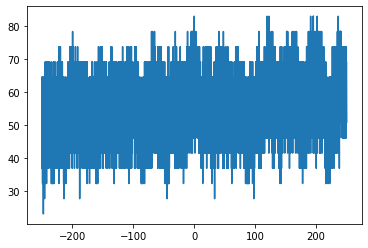

246802
255002
ring_down_19.txt


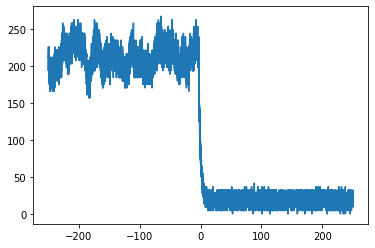

246802
255002
ring_down_20.txt


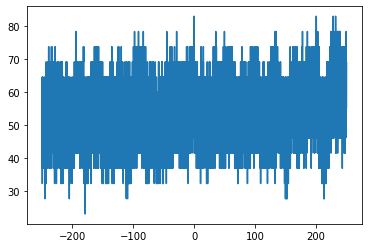

246802
255002
ring_down_21.txt


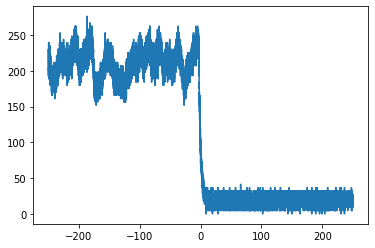

246802
255002
ring_down_22.txt


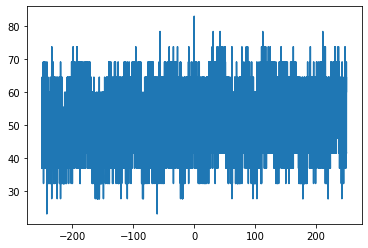

246802
255002
ring_down_23.txt


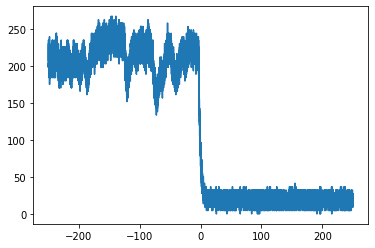

246802
255002
ring_down_24.txt


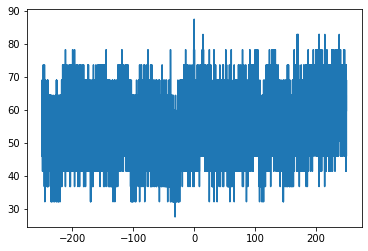

246802
255002
ring_down_25.txt


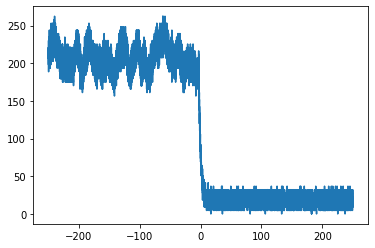

246802
255002
ring_down_26.txt


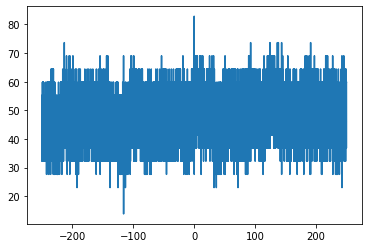

246802
255002
ring_down_27.txt


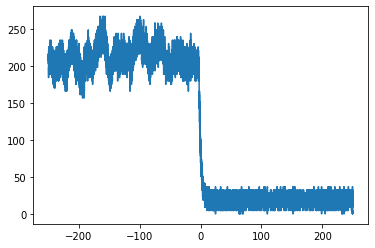

246802
255002
ring_down_28.txt


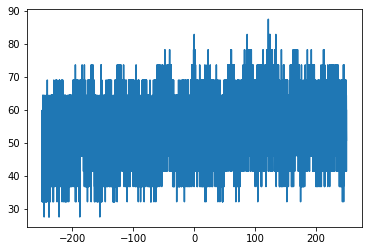

246802
255002
ring_down_29.txt


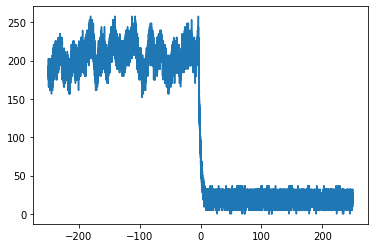

246802
255002
ring_down_30.txt


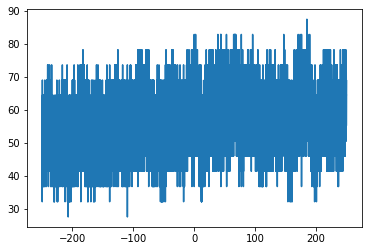

246802
255002
ring_down_31.txt


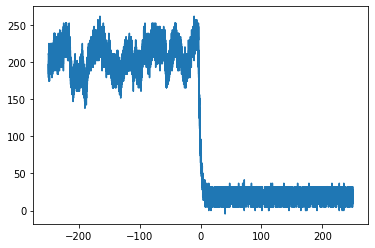

246802
255002
ring_down_32.txt


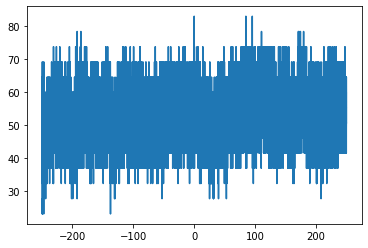

246802
255002


In [6]:
directory_ring = os.path.join(os.getcwd(), "ring_down")
for filename in os.listdir(directory_ring):
    print(filename)
    f = os.path.join(directory_ring, filename)
    data = pd.read_csv(f, sep = "\t", skiprows = range(0,1))
    
    x = data['(us)']
    y = data['(mV)']

    xnp = x.to_numpy()
    ynp = y.to_numpy()
    plt.plot(xnp, ynp)
    plt.show()
    
    xnp = xnp[~np.isnan(xnp)]
    ynp = ynp[~np.isnan(ynp)]

    start = np.where(xnp>=-3.2)
    print(start[0][0])
    end = np.where(xnp>=5)
    print(end[0][0])
    xnp1 = xnp[start[0][0]:end[0][0]]
    ynp1 = ynp[start[0][0]:end[0][0]]
    
    

# Creating array with suitable files 

In [6]:
# list of suitable files
suit = ['ring_down_03.txt', 'ring_down_05.txt', 'ring_down_17.txt', 'ring_down_29.txt', 'ring_down_01.txt', 'ring_down_15.txt', 
        'ring_down_11.txt', 'ring_down_13.txt', 'ring_down_07.txt', 'ring_down_23.txt', 'ring_down_09.txt', 'ring_down_25.txt']

refl_arr = np.zeros(len(suit))
fin_arr = np.zeros(len(suit))
refl_err = np.zeros(len(suit))
fine_err = np.zeros(len(suit))
count = 0 
# looping over all files 
for i, name in enumerate(suit):
    print (name)
    f = os.path.join(os.getcwd(), "ring_down", name)
    data = pd.read_csv(f, sep = "\t", skiprows = range(0,1))
    
    x = data['(us)']
    y = data['(mV)']

    # converting to numpy 
    xnp = x.to_numpy()
    ynp = y.to_numpy() 
    
    # removing nan data 
    xnp = xnp[~np.isnan(xnp)]
    ynp = ynp[~np.isnan(ynp)] 

    # setting upper and lower cuts to observe exponential decay in that region
    start = np.where(xnp>=-3.2)
    print(start[0][0])
    end = np.where(xnp>=5)
    print(end[0][0])
    xnp1 = xnp[start[0][0]:end[0][0]]
    ynp1 = ynp[start[0][0]:end[0][0]]
    y_err = np.ones_like(ynp1) * 50 
    
    #defining exp_decay function for the fit
    def exp_decay(t, a, k, c):
        return a * np.exp(-k * t) + c

    # defining fit function 
    def fit_nonlinear(t, y, y_err):
        opt_para, para_cov = sp.optimize.curve_fit(exp_decay, t, y, sigma = y_err , maxfev = 5000)
        a, k, c = opt_para
        a_err, t_err, c_err = para_cov[0][0], para_cov[1][1], para_cov[2][2]
        return a, k, c, a_err, t_err, c_err
    
    # defining error propagation for reflectivity
    def reflec_err(p, p_err, t_dec, t_err):
        c = 299792458
        r = np.sqrt(np.exp((-p) / (c * t_dec)))
        # return 0.5 * np.sqrt(r ** 3 * p_err ** 2 / (c * t_dec)**2 + r ** 3 * p**2 * t_err ** 2 / c**2)
        return 0.5 * r * np.sqrt((p_err / (c * t_dec))**2. + (p * t_err / (c * t_dec**2.))**2.)
    
    def fin_err(r, r_err):
        # return np.pi * r_err / (1 - r)
        return (r + 1) / (2 * (r - 1)**2. * np.sqrt(r) ) * r_err
        
    
    a, k, c, a_err, t_err, c_err = fit_nonlinear(xnp1, ynp1, y_err)
    print("Amplitude:", a, "+-", a_err, "Decay constant:", (1 / k) * 10 ** (-6), "+-", (t_err * 1e-6) / k ** 2,  
          "Constant:", c, "+-", c_err)
    fit = exp_decay(xnp1, a, k ,c)

    # plotting 
    plt.figure(figsize=(12, 8))
    plt.plot(x, y, label='Measured Data')
    plt.title("Ring Down Measurement")
    plt.xlabel('Time (' r'$\mu$' 's)')
    plt.ylabel("Voltage (mV)")
    plt.plot(xnp1, fit, color = "red", label='Exponential Fit')
    plt.xlim(-15, 15)
    plt.legend()
    plt.grid()
#     plt.show()
    plot_name = 'ring_down_' + str(count)
    plt.savefig(plot_name)
    plt.close()

    # computing reflectivity and finesse, based on the value of perimeter calculated 
    p = 0.9976042591075841
    p_err = 0.00027731796014057746
    t_dec = (1 / k) * 10 ** (-6)
    t_err = t_err * 1e-6
    c = 299792458
    r = np.sqrt(np.exp((-p) / (c * t_dec))) 
    r_err = reflec_err(p, p_err, t_dec, t_err)
    print('Reflectivity', r, "+-", r_err)
    f = (np.pi * np.sqrt(r)) / (1 - r)
    f_err = fin_err(r, r_err)
    print("Finesse", f, "+-", f_err)
    print('\n')
    

    # append them to array
    refl_arr[i] = r
    fin_arr[i] = f
    refl_err[i] = r_err
    fine_err[i] = f_err
    
    
    count = count + 1

ring_down_03.txt
246802
255002
Amplitude: 66.12124808964487 +- 0.2001438883010806 Decay constant: 3.049052276536888e-06 +- 3.257684932242253e-11 Constant: 17.99561733656249 +- 0.13258875712122611
Reflectivity 0.9994544629677966 +- 1.516104549549461e-07
Finesse 5757.144655120688 +- 0.509425515560193


ring_down_05.txt
246802
255002
Amplitude: 64.77033727650118 +- 0.15202168481992212 Decay constant: 2.9118526431435e-06 +- 2.4656735130596607e-11 Constant: 20.862398563149952 +- 0.09865707073410175
Reflectivity 0.9994287658916413 +- 1.5874956831930504e-07
Finesse 5498.087713979654 +- 0.4865016395852652


ring_down_17.txt
246802
255002
Amplitude: 61.84663499069027 +- 0.14406367853665786 Decay constant: 2.978240240680793e-06 +- 2.6205556131043845e-11 Constant: 18.201203580470114 +- 0.09443138471156583
Reflectivity 0.9994414956464581 +- 1.552128642282255e-07
Finesse 5623.439127300455 +- 0.49759339234066374


ring_down_29.txt
246802
255002
Amplitude: 61.787730173167056 +- 0.12409216640670646 De

In [12]:
# def weight_err(a, a_err):
#     return (np.mean(a * a_err)) / np.mean(a)

# print(np.mean(fin_arr), "+-", weight_err(fin_arr, fine_err))
# print(np.mean(refl_arr), "+-", weight_err(refl_arr, refl_err))

print(np.sum(fin_arr / fine_err**2.) / np.sum(1 / fine_err**2.), "+-", np.sqrt(1 / np.sum(1 / fine_err**2.)))
print(np.sum(refl_arr / refl_err**2.) / np.sum(1 / refl_err**2.), "+-", np.sqrt(1 / np.sum(1 / refl_err**2.)))

5587.088057556226 +- 0.14275643151468814
0.9994388581560005 +- 4.503098905336118e-08
